# Защита персональных данных клиентов

## Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузим датасет
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
# создадим функцию, которая покажет всю общую информацию о датасете
def show_info(df_name):  
    display(df_name.head(10))
    print('-------------------------------------------')
    print(df_name.info())
    print('-------------------------------------------')
    print(df_name.describe())
    print('-------------------------------------------')
    df_name.hist(figsize=(15, 20));

Теперь изучим датасет детально

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
-------------------------------------------
               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    2

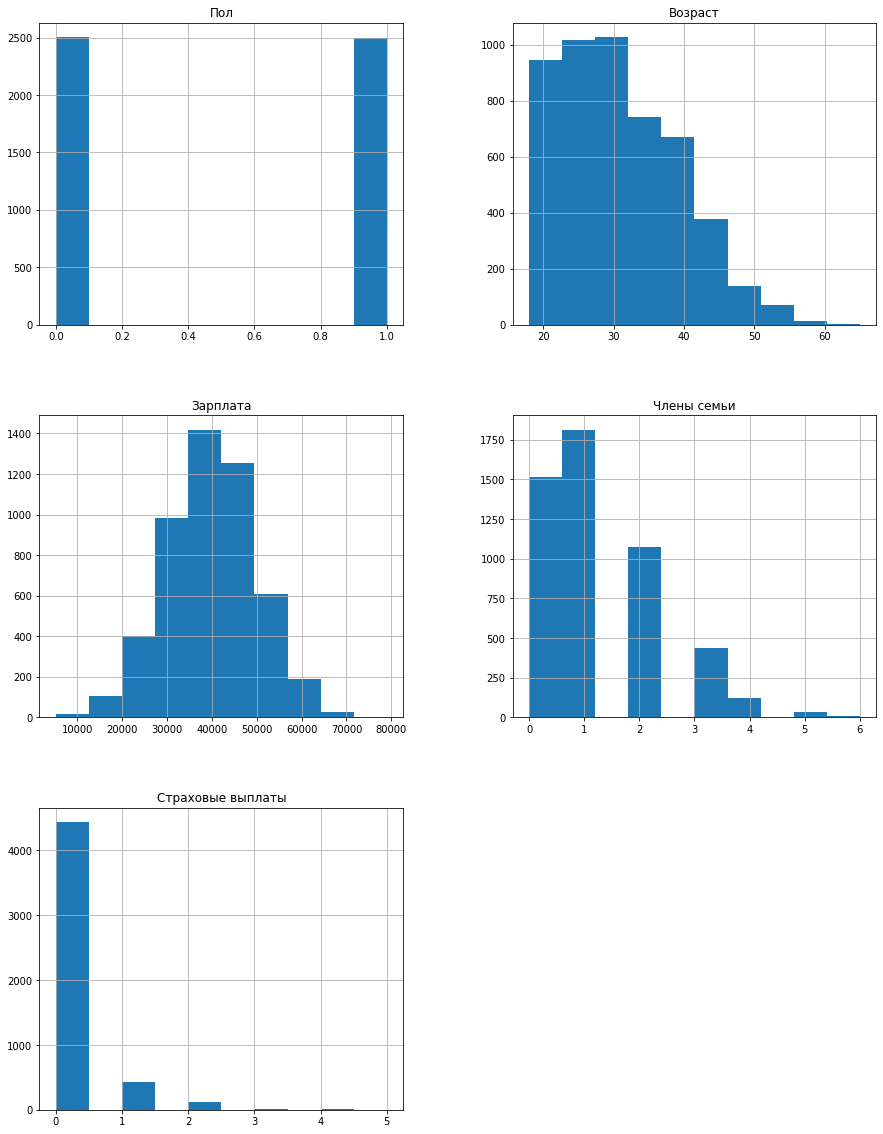

In [4]:
show_info(df)

In [5]:
# исправим названия столбцов
df = df.rename(columns = {'Пол': 'пол', 'Возраст': 'возраст', 'Зарплата': 'зарплата', 'Члены семьи': 'члены_семьи', 
                          'Страховые выплаты': 'страховые_выплаты'})
df.head()

,пол,возраст,зарплата,члены_семьи,страховые_выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


**Вывод:** Нам дан датасет из 5 столбцов и 5000 строк. В датесете нет пропусков, указаны верные форматы и исправлены названия столбцов. Датасет можно считать чистым и готовым для следующих этапов работы.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не измениться. R2 будет одинаковым.

**Обоснование:**

До умножения на обратимую матрицу:
$$
a = Xw
$$
для общего случая
$$
a = X(X^T X)^{-1} X^T y 
$$ 

Но, если у нас матрица $X$ - квадратная и её определитель $det \not= 0$, тогда для неё существует обратная к ней матрица $ X^{-1}$, и наша формула преобразуется в:
$$
a = X(X^T X)^{-1} X^T y = XX^{-1}(X^T)^{-1}X^T y = y$$  т.к. $XX^{-1} = X^{-1}X = E$

После умножения на обратимую матрицу:
$$
a = XPw
$$
где $P $- обратимая матрица

Тогда
$$
a = XP((XP^T) (XP))^{-1} (XP)^T y = XP(P^T(X^T X)P)^{-1} (XP)^T y = XPP^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y = X(X^T X)^{-1} X^T y
$$

что совпадает с первоначальным вариантом. А это значит, качество линейной регрессии не изменится.

По аналогии, если у нас матрица $X$ - квадратная и её определитель $det \not= 0$, тогда для неё существует обратная к ней матрица $ X^{-1}$, и наша формула преобразуется в:
$$
a=y
$$

## Алгоритм преобразования

**Алгоритм**

1. Разделим датасет и выделим в нем целевой признак.
2. Создадим случайную матрицу размером 4x4 и проверим, что она обратима.
3. Умножим наши данные на сгенерированную матрицу.

**Обоснование**

Как показывают расчеты произведенные ранее, после умножения на обратимую матрицу, изменения ключевой метрики (R2) если и будут, то будут очень минимальны.

## Проверка алгоритма

In [6]:
# выделим целевой признак
X = df.drop('страховые_выплаты', axis=1)
y = df['страховые_выплаты']

In [7]:
print(X.shape)
print(y.shape)

(5000, 4)
(5000,)


In [8]:
# создадим функцию для расчета R2
def R2_score(X, y):
    model = LinearRegression()
    model.fit(X, y)
    prediction = model.predict(X)
    r2 = r2_score(y, prediction)
    return r2

In [9]:
# создадим случайную матрицу 4x4 и проверим что она обратима
matrix = np.random.rand(4, 4)
matrix_inv = np.linalg.inv(matrix)
print('Матрица 4x4:')
print(matrix)
print('')
print('Обратная матрица:')
print(matrix_inv)

Матрица 4x4:
[[0.92560999 0.05307241 0.8750555  0.896681  ]
 [0.58302545 0.51814294 0.80893183 0.39855   ]
 [0.09699177 0.09767491 0.24028922 0.57768497]
 [0.17860109 0.90377065 0.34750593 0.44356501]]

Обратная матрица:
[[ 2.81420076 -2.64652109 -3.90446961  1.77399933]
 [ 0.10507113 -0.45351182 -0.97566197  1.46575381]
 [-2.3319425   3.99642778  2.74430693 -2.45085295]
 [ 0.47971395 -1.14129861  1.41006217  0.47375796]]


In [10]:
# вычислим R2 до умножения
R2_score(X, y)

0.4249455028666801

In [11]:
# теперь умножим на случайную матрицу и найдем R2
matrix_new = np.dot(X, matrix)
R2_score(matrix_new, y)

0.42494550286667276

**Вывод:** Как мы и предполагали умножение на матрицу не изменило метрику, качество модели осталось прежним и равно 0.4249455 .

Проверим еще несколько способов изменений с помощью математических операций.

In [12]:
matrix_new1 = (((X * 45) / 76) + 2) - 11
R2_score(matrix_new1, y)

0.42494550286668

In [13]:
# умножим наши данные на вектор
matrix_new2 = X * np.log(118) - 123
R2_score(matrix_new2, y)

0.42494550286668

**Вывод:** Математические операции также не повлияли на изменение метрики качества модели.

## Общий вывод

В качестве средства защиты персональных данных страховой компании рекомендуется рассмотреть алгоритм умножения данных на случайную матрицу. Согласно проведенного исследования удалось установить, что умножение никак не изменит метрику качества модели машинного обучения. Метрика R2 (коэффициент детерминации) в модели линейной регрессии до и после умножений осталась прежней и была равна 0.4249455 .